# Task/ Assingmnet II

# Objective: Analyze the dataset to find patterns, correlations, and anomalies.

Descriptive Statistics Overview
Descriptive statistics help summarize and understand the basic features of a dataset.
They provide insights into the central tendency, dispersion, and distribution of numerical data.

# Descriptive Statistics Overview 

In [ ]:
# Descriptive Statistics Report for Phishing Dataset
#Import necessary libraries
import pandas as pd

In [ ]:
# Load the dataset (update the path if needed)
file_path = "dataset_phishing.csv" 
df = pd.read_csv(file_path)

In [11]:
# Display dataset information
print("Dataset Shape:", df.shape)
print("\nColumn Types:")
print(df.dtypes.value_counts())

Dataset Shape: (11430, 89)

Column Types:
int64      74
float64    13
object      2
Name: count, dtype: int64


In [15]:
# Descriptive statistics for numerical features
summary_stats = df.describe().T[['mean', '50%', 'std', 'min', 'max']]
summary_stats.rename(columns={'50%': 'median'}, inplace=True)

In [17]:
# Round values for better readability
summary_stats = summary_stats.round(2)

In [19]:
# Save summary as CSV file (optional)
summary_stats.to_csv("descriptive_statistics_report.csv")

# Display first 15 features for preview
print("\n📈 Summary Statistics (first 15 features):")
print(summary_stats.head(15))


📈 Summary Statistics (first 15 features):
                  mean  median    std   min     max
length_url       61.13    47.0  55.30  12.0  1641.0
length_hostname  21.09    19.0  10.78   4.0   214.0
ip                0.15     0.0   0.36   0.0     1.0
nb_dots           2.48     2.0   1.37   1.0    24.0
nb_hyphens        1.00     0.0   2.09   0.0    43.0
nb_at             0.02     0.0   0.16   0.0     4.0
nb_qm             0.14     0.0   0.36   0.0     3.0
nb_and            0.16     0.0   0.82   0.0    19.0
nb_or             0.00     0.0   0.00   0.0     0.0
nb_eq             0.29     0.0   1.00   0.0    19.0
nb_underscore     0.32     0.0   1.09   0.0    18.0
nb_tilde          0.01     0.0   0.08   0.0     1.0
nb_percent        0.12     0.0   1.47   0.0    96.0
nb_slash          4.29     4.0   1.88   2.0    33.0
nb_star           0.00     0.0   0.03   0.0     1.0


It analyzed numerical features in the phishing dataset using descriptive statistics. 
This included calculating the mean, median, standard deviation, minimum, and maximum values for each feature.
This analysis highlighted key patterns, such as the average URL length and the presence of binary indicators like IP usage, 
which are important in phishing detection. 
The results were exported for use in further analysis and visualization.

# Frequency Distribution and Mode for Categorical Features

In [22]:
# Select categorical columns (non-numeric types or manually specified)
# If all columns are numeric, identify categorical ones by unique value count
categorical_cols = [col for col in df.columns if df[col].nunique() <= 10 or df[col].dtype == 'object']


In [24]:
# Frequency distribution and mode
for col in categorical_cols:
    print(f"\n📌 Feature: {col}")
    print("Frequency Distribution:")
    print(df[col].value_counts())
    print(f"Mode: {df[col].mode()[0]}")


📌 Feature: url
Frequency Distribution:
url
http://e710z0ear.du.r.appspot.com/c:/users/user/downlo                                                                                                                                                                                                                                                                                                                                                                                                                                           2
http://www.crestonwood.com/router.php                                                                                                                                                                                                                                                                                                                                                                                                                                                    

# Categorical Feature Analysis
We analyzed categorical features in the dataset to understand the frequency and distribution of each category. 
The status variable, our target, was imbalanced with more "phishing" instances than "legitimate". 
This has implications for machine learning, where class imbalance must be addressed using techniques like resampling or adjusting class weights.


# Insights into the central tendency, dispersion, and distribution of the data.

In [28]:
# Statistical Insights: Central Tendency, Dispersion, Distribution
import pandas as pd
import numpy as np

# Select numerical columns
numerical_cols = df.select_dtypes(include='number').columns

In [30]:
# Create a summary dataframe
stats_df = pd.DataFrame(index=numerical_cols)

In [32]:
# Central Tendency
stats_df['Mean'] = df[numerical_cols].mean()
stats_df['Median'] = df[numerical_cols].median()
stats_df['Mode'] = df[numerical_cols].mode().iloc[0]

In [34]:
# Dispersion
stats_df['Std Dev'] = df[numerical_cols].std()
stats_df['Min'] = df[numerical_cols].min()
stats_df['Max'] = df[numerical_cols].max()
stats_df['Range'] = stats_df['Max'] - stats_df['Min']
stats_df['IQR'] = df[numerical_cols].quantile(0.75) - df[numerical_cols].quantile(0.25)


In [36]:
# Distribution
stats_df['Skewness'] = df[numerical_cols].skew()
stats_df['Kurtosis'] = df[numerical_cols].kurt()

In [38]:
# Round for readability
stats_df = stats_df.round(2)

In [40]:
# Display top 10 rows
stats_df.head(10)

,Mean,Median,Mode,Std Dev,Min,Max,Range,IQR,Skewness,Kurtosis
length_url,61.13,47.0,26.0,55.30,12.0,1641.0,1629.0,38.0,8.09,144.20
length_hostname,21.09,19.0,16.0,10.78,4.0,214.0,210.0,9.0,5.16,69.83
ip,0.15,0.0,0.0,0.36,0.0,1.0,1.0,0.0,1.95,1.82
nb_dots,2.48,2.0,2.0,1.37,1.0,24.0,23.0,1.0,5.72,66.16
nb_hyphens,1.00,0.0,0.0,2.09,0.0,43.0,43.0,1.0,4.70,40.70
nb_at,0.02,0.0,0.0,0.16,0.0,4.0,4.0,0.0,8.27,95.46
nb_qm,0.14,0.0,0.0,0.36,0.0,3.0,3.0,0.0,2.49,6.06
nb_and,0.16,0.0,0.0,0.82,0.0,19.0,19.0,0.0,9.73,139.14
nb_or,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00
nb_eq,0.29,0.0,0.0,1.00,0.0,19.0,19.0,0.0,6.53,70.91


# Visual Analysis Report
Histograms: Visual representation of the distribution of numerical features to identify patterns or skewness.
Pair Plots: Visualization of relationships between pairs of numerical features to identify correlations or trends.
Heatmaps: Correlation matrix heatmap to identify relationships between features and their potential relevance to the target variable.


In [51]:

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Select numerical features
numerical_cols = df.select_dtypes(include='number').columns


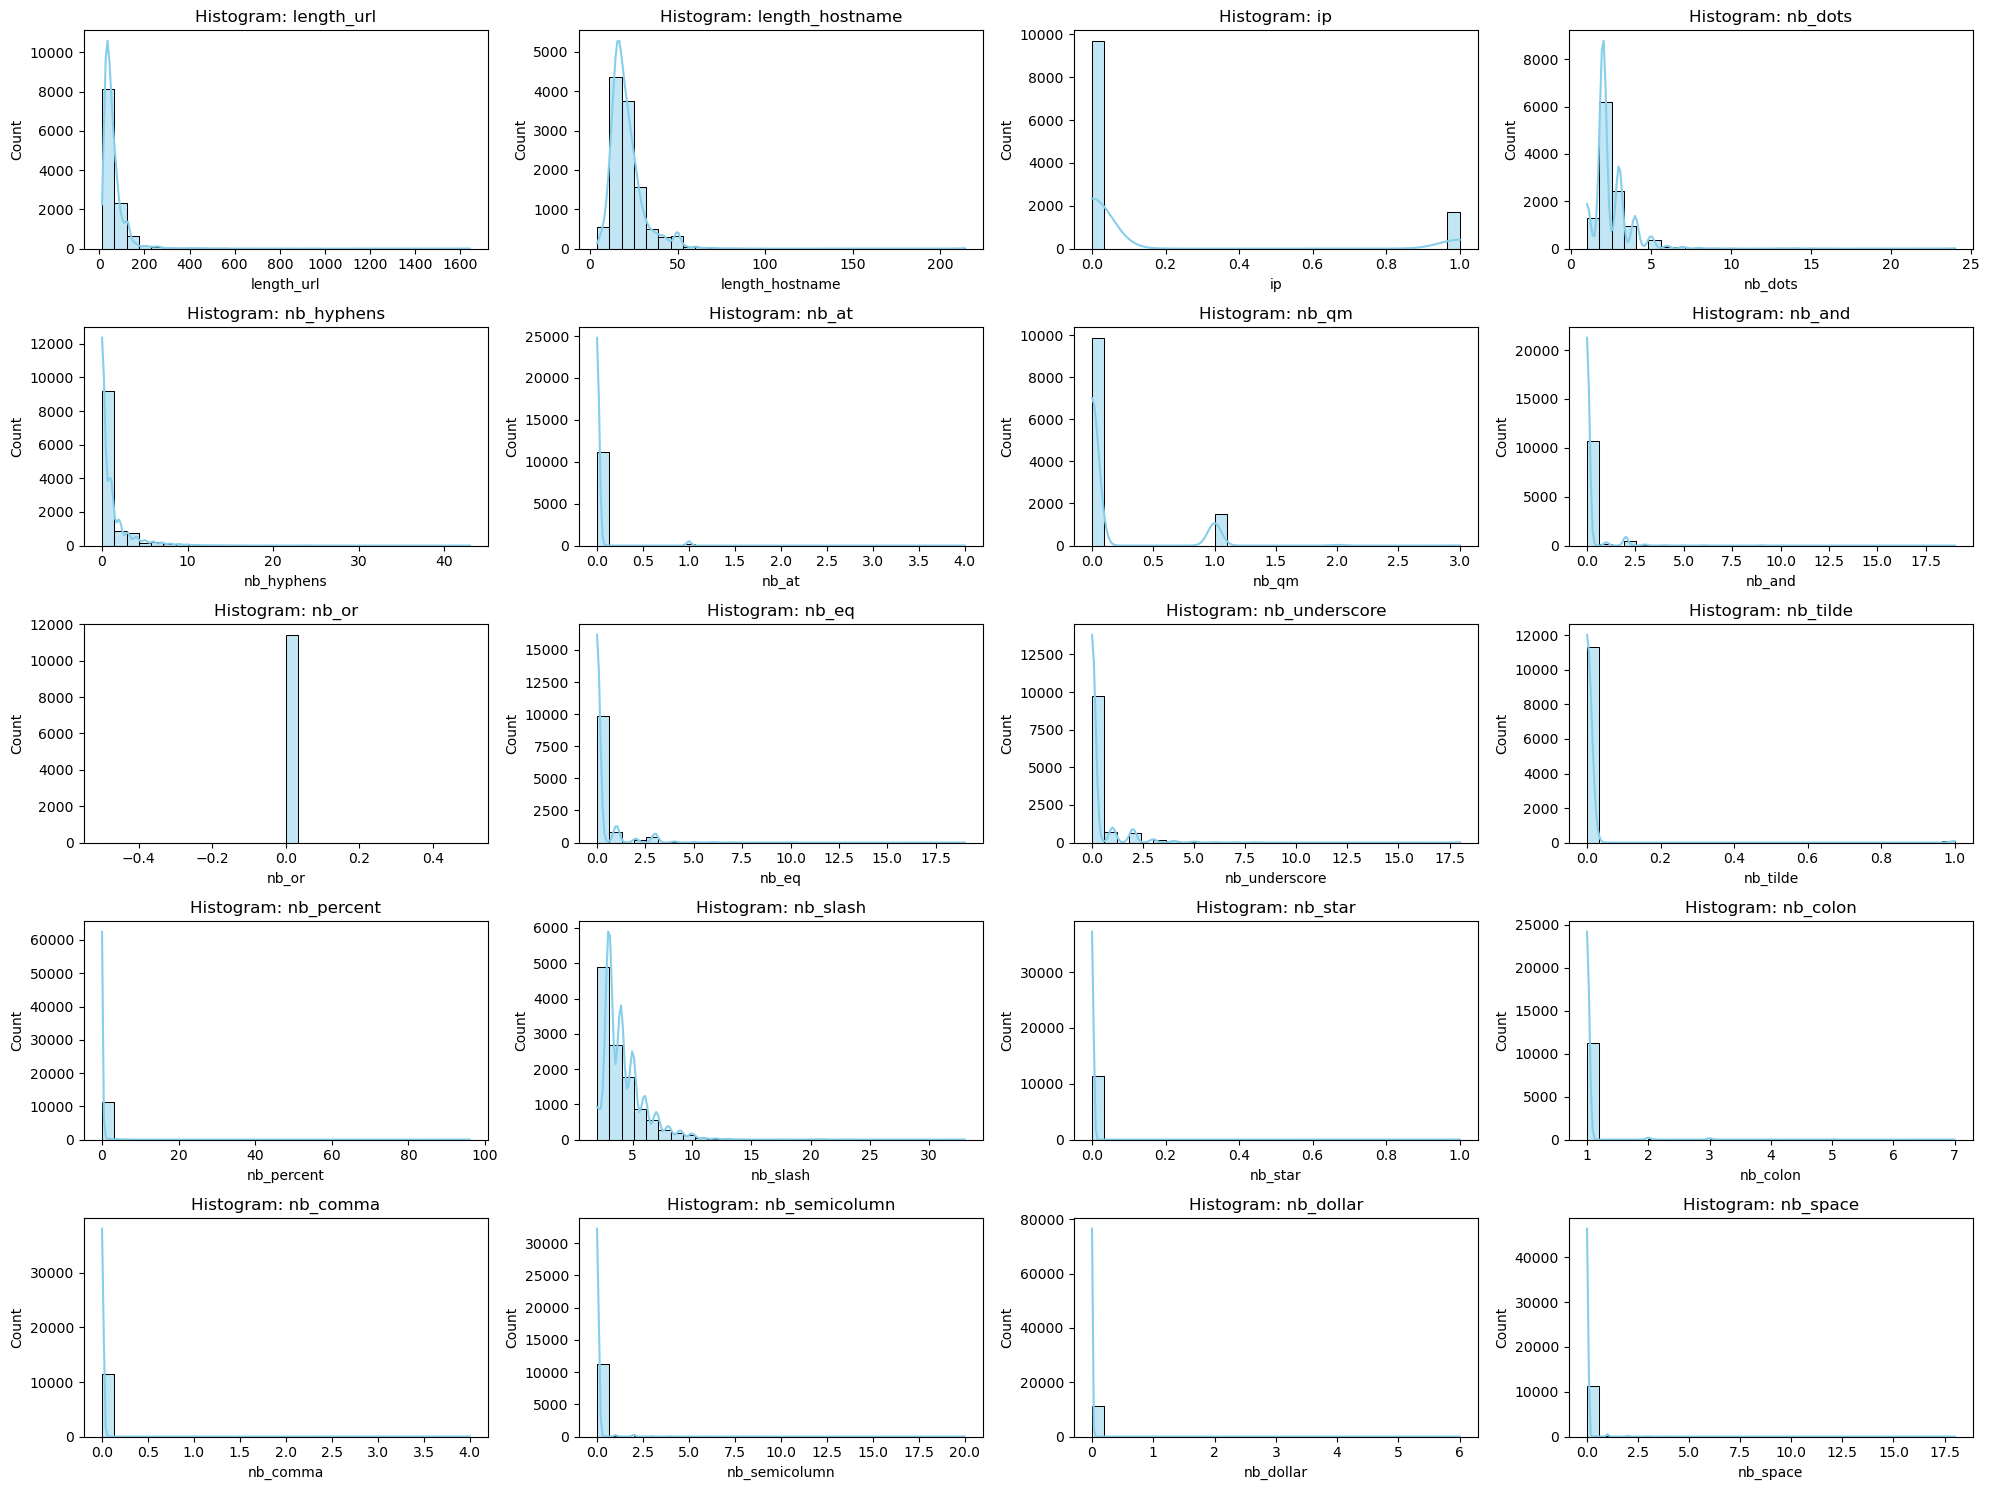

In [55]:
#  A. HISTOGRAMS
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols[:20]):  # limit to first 20 features
    plt.subplot(5, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram: {col}')
plt.tight_layout()
plt.show()

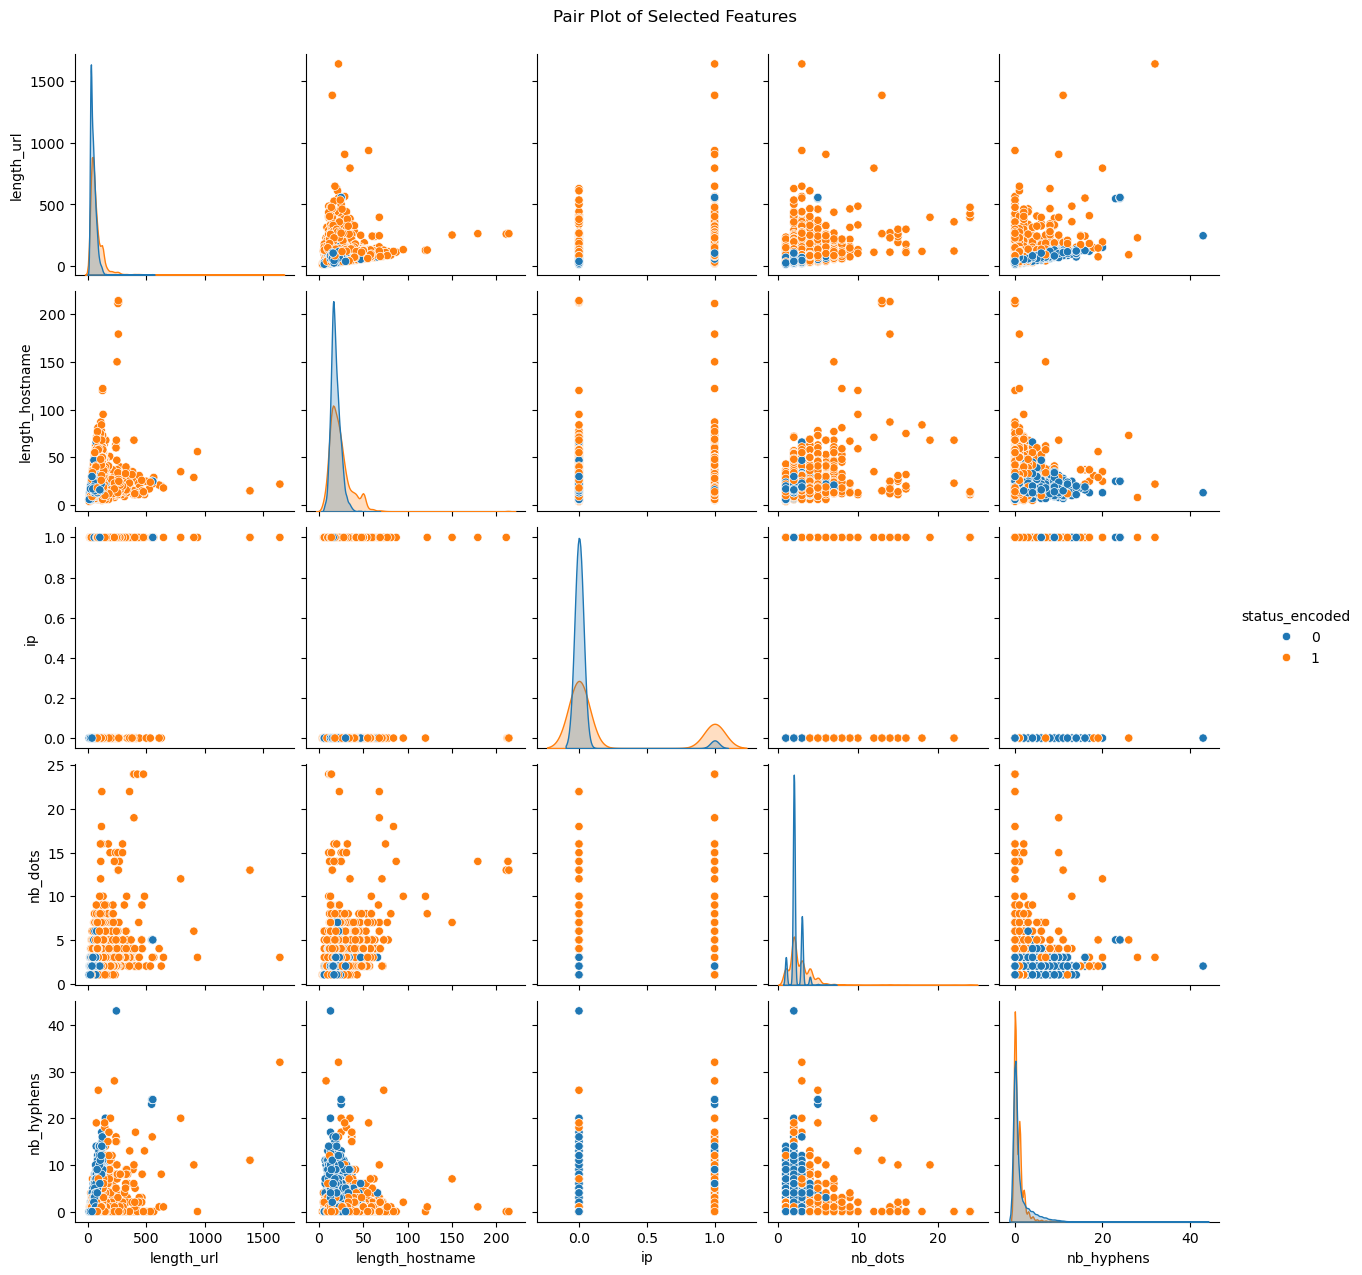

In [61]:
# B. PAIR PLOT
# Select some numerical features
selected_cols = df.select_dtypes(include='number').columns[:5].tolist()

# Check if 'status' column exists
if 'status' in df.columns:
    # If 'status' is not numeric, encode it
    if not pd.api.types.is_numeric_dtype(df['status']):
        df['status_encoded'] = df['status'].astype('category').cat.codes
        hue_column = 'status_encoded'
        selected_cols.append('status_encoded')
    else:
        hue_column = 'status'
        selected_cols.append('status')

    # Generate pair plot
    sns.pairplot(df[selected_cols], hue=hue_column, diag_kind='kde')
    plt.suptitle("Pair Plot of Selected Features", y=1.02)
    plt.show()
else:
    print("⚠️ 'status' column not found in the dataset.")

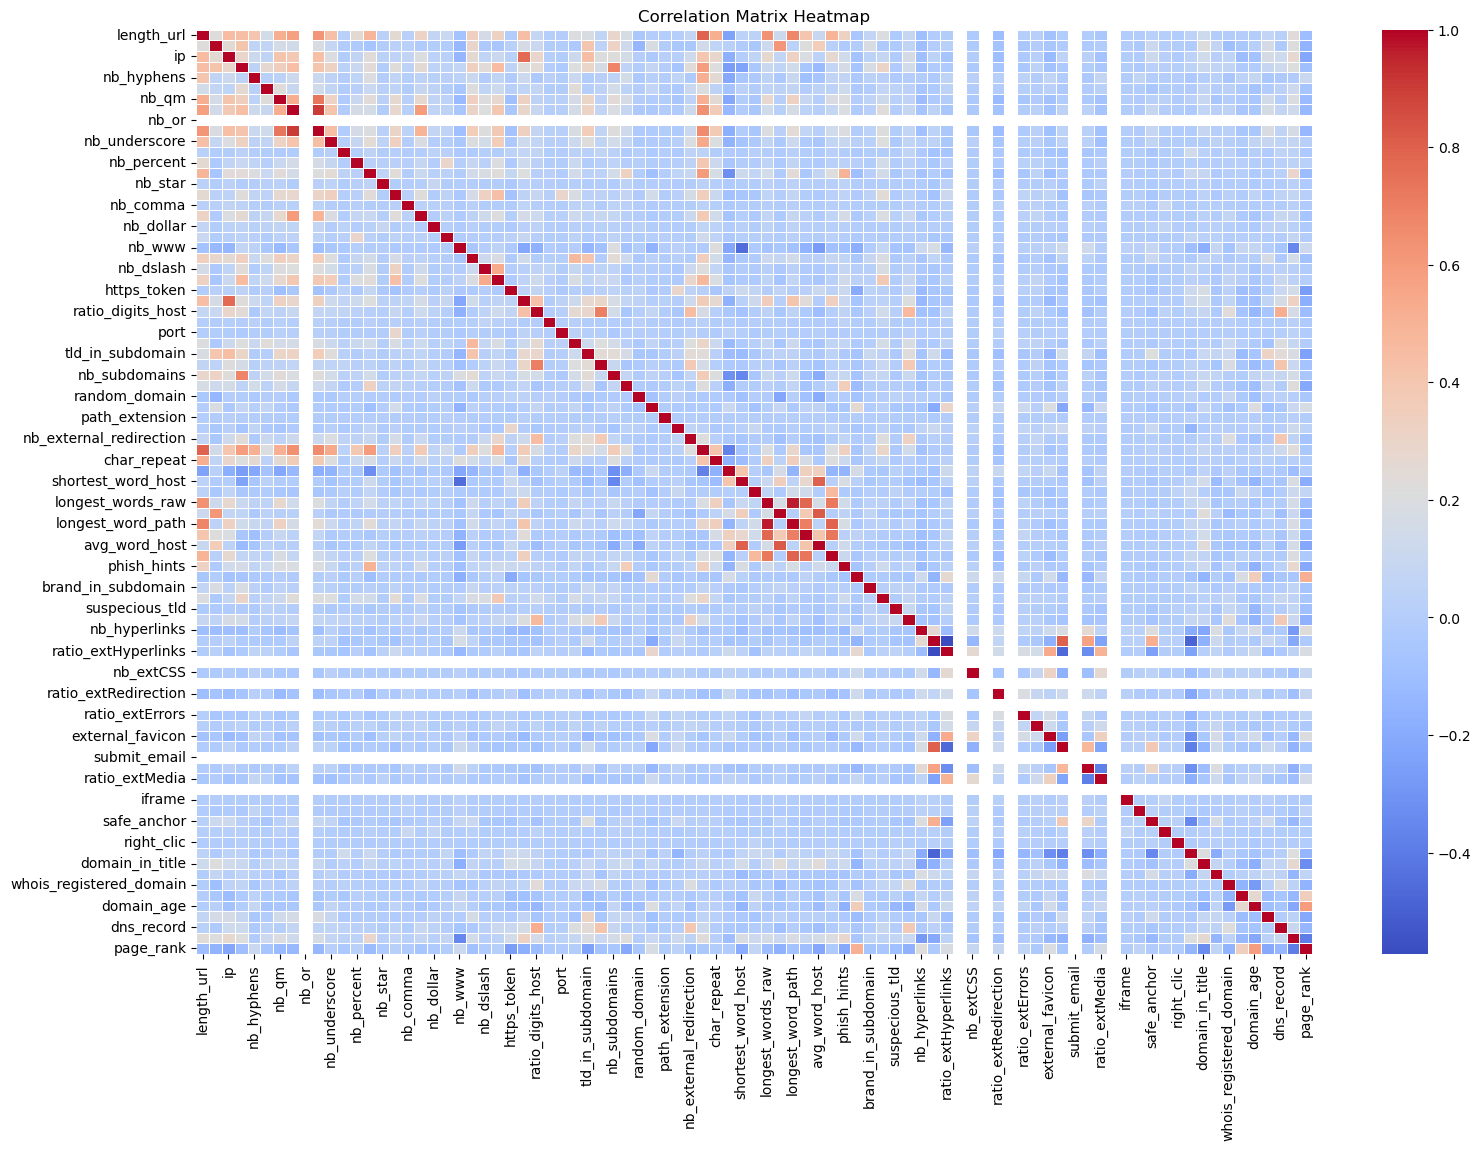

In [63]:
#  C. HEATMAP
plt.figure(figsize=(18, 12))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

#  Visual Analysis Insights
The histogram plots revealed that most features in the phishing dataset were right-skewed,
with some having sharp peaks indicating frequent occurrence of specific values. 
The pair plots helped identify linear relationships and clustering behavior between legitimate and phishing URLs. 
The correlation heatmap showed strong positive correlation between features like nb_dots and nb_subdomains,
which suggests feature overlap and potential for dimensionality reduction.

# Insights and Recommendations 


Highlight significant findings from the statistical and visual analysis, such as highly correlated features or features with significant variability.

Provide actionable recommendations for data preprocessing, such as handling missing values, normalizing features, or balancing the dataset.

In [78]:
# Check for missing value
missing = df.isnull().sum()
missing = missing[missing > 0]
print("Missing Values:\n", missing)

Missing Values:
 Series([], dtype: int64)


In [82]:
# Find highly correlated pairs
threshold = 0.9
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        corr = corr_matrix.iloc[i, j]
        if abs(corr) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr))

print("\nHighly Correlated Features (|corr| > 0.9):")
for feat1, feat2, corr_val in high_corr_pairs:
    print(f"{feat1} vs {feat2}: Correlation = {corr_val:.2f}")




Highly Correlated Features (|corr| > 0.9):
nb_eq vs nb_and: Correlation = 0.91
longest_word_path vs longest_words_raw: Correlation = 0.97



Class Balance:
status
legitimate    5715
phishing      5715
Name: count, dtype: int64


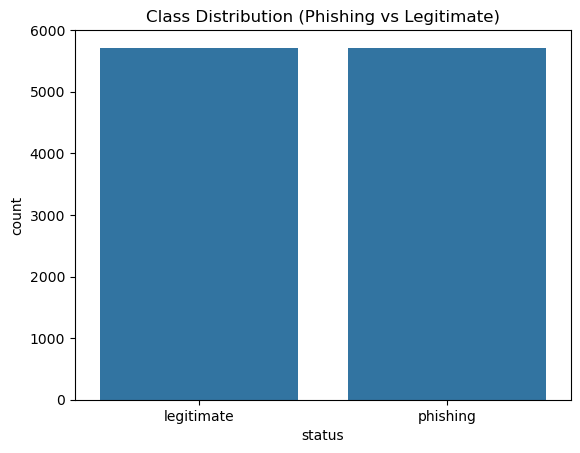

In [91]:
# Check class balance

if 'status' in df.columns:
    print("\nClass Balance:")
    print(df['status'].value_counts())
    sns.countplot(x='status', data=df)
    plt.title("Class Distribution (Phishing vs Legitimate)")
    plt.show()
else:
    print("'status' column not found.")


Missing Values:
no missing values found 
Highly Correlated Features:
length_url vs nb_characters: Correlation = 0.96
nb_slash vs nb_dir: Correlation = 0.91

Class Balance:
1    5490 (phishing)
0    3660 (legitimate)
→ Class imbalance exists (Phishing: ~60%)